In [37]:
import pandas as pd

# Load Data

Load the inference results of the binary classifier with the test dataset

In [38]:
classifier_post_pred = pd.read_csv('/Users/alexis/Cranfield/AI/assignment/data/test/classifier_post_pred.csv')
classifier_post_pred

,target,image_id
0,1,f7f7736401b22c94a9d2b09425adeab9
1,1,93ae57ca1df1d19c6d64155e74e14d23
2,0,f1a45afaee0efd07fef17057f3942464
3,0,559fdfb3b9db3eb206b9521824f716e3
4,0,371d6f540ac601affe81e547b05c551a
...,...,...
14995,0,0c5ff01c7bfb4362fcd98f36e555b08c
14996,0,3286115baacb6ed3affc5c46c9205b7a
14997,0,d44766bf0eb902fbc1848f418417c45f
14998,1,cd7b83d24ee9c092a0f32cb020da6dac


Load the test dataset

In [39]:
test_df = pd.read_csv('/Users/alexis/Cranfield/AI/assignment/data/test/test.csv')
test_df.head()

,image_id,class_name,rad_id,x_min,y_min,x_max,y_max,class_id
0,27b822c5d3b354f096dfb788fd3fa636,Nodule/Mass,R10,277.0,602.0,1177.0,2417.0,8
1,d2ca714f8f06979acfbc0992d65fb211,No finding,R3,NaN,NaN,NaN,NaN,14
2,19367e88f4634c2652d3eed0a2f1f8b2,No finding,R15,NaN,NaN,NaN,NaN,14
3,852ec6a0bcb9608ffee9b3fda0867f91,Aortic enlargement,R8,1669.0,896.0,1972.0,1326.0,0
4,aa9c3097e6d2df7216be1a1642f683c9,No finding,R5,NaN,NaN,NaN,NaN,14


Load the Fast-R-CNN model inferences results of the test dataset

In [40]:
test_prediction_reformatted = pd.read_csv("/Users/alexis/Cranfield/AI/assignment/data/test/test_predictions_reformatted.csv")
test_prediction_reformatted

,image_id,class_id,score,x_min,y_min,x_max,y_max
0,27b822c5d3b354f096dfb788fd3fa636,8,0.9025,126.330879,444.504883,146.634857,465.767639
1,27b822c5d3b354f096dfb788fd3fa636,8,0.8972,624.478821,517.039246,648.789368,541.510315
2,27b822c5d3b354f096dfb788fd3fa636,0,0.8267,395.955627,253.043365,498.742554,370.395782
3,27b822c5d3b354f096dfb788fd3fa636,11,0.7635,79.230217,631.803955,115.134575,678.047119
4,27b822c5d3b354f096dfb788fd3fa636,8,0.7218,124.820206,580.891052,149.161972,608.366394
...,...,...,...,...,...,...,...
50784,eb6c714df22142229464c6b83e47d7d6,7,0.1332,88.431931,360.150146,249.270676,657.024170
50785,eb6c714df22142229464c6b83e47d7d6,8,0.1291,587.680969,261.416504,622.254578,295.633301
50786,eb6c714df22142229464c6b83e47d7d6,13,0.1236,151.587982,412.933960,313.308380,598.072754
50787,eb6c714df22142229464c6b83e47d7d6,8,0.1098,151.649857,346.123566,265.484253,418.405914


Load the metadata csv

In [41]:
metadata_df = pd.read_csv('/Users/alexis/Cranfield/AI/assignment/data/test/dicom_metadata.csv')
metadata_df.head()

,File Name,Transfer Syntax UID,SOP Class UID,SOP Instance UID,Version,Photometric Interpretation,Pixel Representation,High Bit,Samples per Pixel,Bits Allocated,...,Lossy Image Compression,Lossy Image Compression Ratio,Patient's Sex,Patient's Age,Rows,Columns,Pixel Spacing,Bits Stored,Window Center,Window Width
0,f7f7736401b22c94a9d2b09425adeab9.dicom,1.2.840.10008.1.2.4.90,1.2.840.10008.5.1.4.1.1.1.1,f7f7736401b22c94a9d2b09425adeab9,INF_3.9,MONOCHROME2,0,11,1,16,...,0.0,NaN,F,037Y,3028,2517,"[0.139, 0.139]",12,2048.0,4096.0
1,93ae57ca1df1d19c6d64155e74e14d23.dicom,1.2.840.10008.1.2,1.2.840.10008.5.1.4.1.1.1.1,93ae57ca1df1d19c6d64155e74e14d23,NaN,MONOCHROME2,0,13,1,16,...,NaN,NaN,O,Y,3072,3072,"[0.139000, 0.139000]",14,10287.0,5292.0
2,f1a45afaee0efd07fef17057f3942464.dicom,1.2.840.10008.1.2.4.90,1.2.840.10008.5.1.4.1.1.1,f1a45afaee0efd07fef17057f3942464,OFFIS_DCMTK_360,MONOCHROME1,0,11,1,16,...,0.0,NaN,M,NaN,2880,2304,"[0.15, 0.15]",12,2047.0,4095.0
3,559fdfb3b9db3eb206b9521824f716e3.dicom,1.2.840.10008.1.2,1.2.840.10008.5.1.4.1.1.1,559fdfb3b9db3eb206b9521824f716e3,OFFIS_DCMTK_360,MONOCHROME2,0,13,1,16,...,NaN,NaN,M,038Y,3072,2540,"[0.140, 0.140]",14,10075.0,10242.0
4,371d6f540ac601affe81e547b05c551a.dicom,1.2.840.10008.1.2,1.2.840.10008.5.1.4.1.1.1,371d6f540ac601affe81e547b05c551a,OFFIS_DCMTK_360,MONOCHROME2,0,13,1,16,...,NaN,NaN,M,060Y,3072,3072,"[0.140, 0.140]",14,8755.0,10228.0


## Data Preprocessing

Retrieves the original sizes of DICOM images

In [42]:
image_sizes_df = metadata_df[['File Name', 'Rows', 'Columns']]
image_sizes_df.head()

,File Name,Rows,Columns
0,f7f7736401b22c94a9d2b09425adeab9.dicom,3028,2517
1,93ae57ca1df1d19c6d64155e74e14d23.dicom,3072,3072
2,f1a45afaee0efd07fef17057f3942464.dicom,2880,2304
3,559fdfb3b9db3eb206b9521824f716e3.dicom,3072,2540
4,371d6f540ac601affe81e547b05c551a.dicom,3072,3072


Handles the null values of the test dataset for no finding entries

In [43]:
test_df['x_min'] = test_df['x_min'].fillna(0)
test_df['y_min'] = test_df['y_min'].fillna(0)
test_df['x_max'] = test_df['x_max'].fillna(1)
test_df['y_max'] = test_df['y_max'].fillna(1)

Adds the original sizes of the DICOM images to the Dataframe

In [44]:
image_sizes_df = image_sizes_df.rename(columns={"File Name": "image_id"})
# Drop .dicom from the image_id
image_sizes_df["image_id"] = image_sizes_df["image_id"].str.replace(".dicom", "")
image_sizes_df

,image_id,Rows,Columns
0,f7f7736401b22c94a9d2b09425adeab9,3028,2517
1,93ae57ca1df1d19c6d64155e74e14d23,3072,3072
2,f1a45afaee0efd07fef17057f3942464,2880,2304
3,559fdfb3b9db3eb206b9521824f716e3,3072,2540
4,371d6f540ac601affe81e547b05c551a,3072,3072
...,...,...,...
14995,0c5ff01c7bfb4362fcd98f36e555b08c,2880,2304
14996,3286115baacb6ed3affc5c46c9205b7a,2880,2304
14997,d44766bf0eb902fbc1848f418417c45f,2208,2104
14998,cd7b83d24ee9c092a0f32cb020da6dac,2926,2847


Merging the dataframes

In [45]:
test_prediction_reformatted = test_prediction_reformatted.merge(image_sizes_df, on="image_id", how="left")
test_prediction_reformatted

,image_id,class_id,score,x_min,y_min,x_max,y_max,Rows,Columns
0,27b822c5d3b354f096dfb788fd3fa636,8,0.9025,126.330879,444.504883,146.634857,465.767639,2968,2580
1,27b822c5d3b354f096dfb788fd3fa636,8,0.8972,624.478821,517.039246,648.789368,541.510315,2968,2580
2,27b822c5d3b354f096dfb788fd3fa636,0,0.8267,395.955627,253.043365,498.742554,370.395782,2968,2580
3,27b822c5d3b354f096dfb788fd3fa636,11,0.7635,79.230217,631.803955,115.134575,678.047119,2968,2580
4,27b822c5d3b354f096dfb788fd3fa636,8,0.7218,124.820206,580.891052,149.161972,608.366394,2968,2580
...,...,...,...,...,...,...,...,...,...
50784,eb6c714df22142229464c6b83e47d7d6,7,0.1332,88.431931,360.150146,249.270676,657.024170,3073,2532
50785,eb6c714df22142229464c6b83e47d7d6,8,0.1291,587.680969,261.416504,622.254578,295.633301,3073,2532
50786,eb6c714df22142229464c6b83e47d7d6,13,0.1236,151.587982,412.933960,313.308380,598.072754,3073,2532
50787,eb6c714df22142229464c6b83e47d7d6,8,0.1098,151.649857,346.123566,265.484253,418.405914,3073,2532


In [46]:
test_prediction_reformatted = test_prediction_reformatted.rename(columns={"Rows": "image_height", "Columns": "image_width"})

Resizes the predicted bounding boxes

In [47]:
def resizeBox(x, x_target, x_original):
    scale = x_original / x_target
    return x * scale

target_size = (800, 800)

# Resize the bounding boxes (only when class_id is not 14
test_prediction_reformatted["x_min"] = test_prediction_reformatted.apply(lambda x: resizeBox(x.x_min, target_size[0], x.image_width) if x.class_id != 14 else x.x_min, axis=1)
test_prediction_reformatted["x_max"] = test_prediction_reformatted.apply(lambda x: resizeBox(x.x_max, target_size[0], x.image_width) if x.class_id != 14 else x.x_max, axis=1)
test_prediction_reformatted["y_min"] = test_prediction_reformatted.apply(lambda x: resizeBox(x.y_min, target_size[1], x.image_height) if x.class_id != 14 else x.y_min, axis=1)
test_prediction_reformatted["y_max"] = test_prediction_reformatted.apply(lambda x: resizeBox(x.y_max, target_size[1], x.image_height) if x.class_id != 14 else x.y_max, axis=1)

Retrieves the image IDs suspected to belong to the "No finding" class

In [48]:
image_id_suspect = classifier_post_pred[classifier_post_pred['target'] == 1]['image_id']
image_id_suspect

0        f7f7736401b22c94a9d2b09425adeab9
1        93ae57ca1df1d19c6d64155e74e14d23
7        44915a5a80fe7dc3731da239292a0084
9        2b53263b9e1c1bb5be138fa99a44d51b
10       0890c2d68d17561848b25c61fb1da200
                       ...               
14990    9aca89cb31a6b994bb3152388e177a3f
14991    f3a2cd6042a97b2698c4856c6fd14f35
14992    36fe511e6a4678c3cc0eb13575973bb5
14998    cd7b83d24ee9c092a0f32cb020da6dac
14999    3b219f94795c80a122ac4948b4f1c2a6
Name: image_id, Length: 10145, dtype: object

In [49]:
image_id_suspect = classifier_post_pred[classifier_post_pred['target'] == 1]['image_id'].unique()
image_id_suspect

array(['f7f7736401b22c94a9d2b09425adeab9',
       '93ae57ca1df1d19c6d64155e74e14d23',
       '44915a5a80fe7dc3731da239292a0084', ...,
       '36fe511e6a4678c3cc0eb13575973bb5',
       'cd7b83d24ee9c092a0f32cb020da6dac',
       '3b219f94795c80a122ac4948b4f1c2a6'], dtype=object)

All detections of suspected images are not considered

In [50]:
# Ensure 'image_id' columns are of the same type in both DataFrames for reliable comparison
test_prediction_reformatted['image_id'] = test_prediction_reformatted['image_id'].astype(str)
classifier_post_pred['image_id'] = classifier_post_pred['image_id'].astype(str)

# Find 'image_id's in 'classifier_post_pred' where 'target' is 1
target_image_ids = classifier_post_pred[classifier_post_pred["target"] == 1]["image_id"].unique()

# Update 'test_prediction_reformatted' rows where 'image_id' matches those in 'target_image_ids'
condition = test_prediction_reformatted["image_id"].isin(target_image_ids)
test_prediction_reformatted.loc[condition, "class_id"] = 14
test_prediction_reformatted.loc[condition, "x_min"] = 0.0
test_prediction_reformatted.loc[condition, "y_min"] = 0.0
test_prediction_reformatted.loc[condition, "x_max"] = 1.0
test_prediction_reformatted.loc[condition, "y_max"] = 1.0
test_prediction_reformatted.loc[condition, "score"] = 1.0

test_prediction_reformatted = test_prediction_reformatted.drop_duplicates()


In [51]:
# Number of unique image_ids in the test set
len(test_df["image_id"].unique())

7028

In [52]:
# Number of unique image_ids in the prediction set
len(test_prediction_reformatted["image_id"].unique())

7028

In [53]:
numberOfRecordsPerClass = test_prediction_reformatted.groupby("class_id").size().reset_index(name="counts")
numberOfRecordsPerClass

,class_id,counts
0,0,2841
1,1,180
2,2,870
3,3,2496
4,4,531
5,5,1219
6,6,1690
7,7,5244
8,8,2813
9,9,3017


In [54]:
numberOfRecordsPerClass["counts"].sum()

45541

In [55]:
numberOfRecordsPerClassTarget = test_df.groupby("class_id").size().reset_index(name="counts")
numberOfRecordsPerClassTarget

,class_id,counts
0,0,1074
1,1,42
2,2,144
3,3,814
4,4,83
5,5,150
6,6,187
7,7,373
8,8,387
9,9,331


In [56]:
numberOfRecordsPerClassTarget["counts"].sum()

10188

In [57]:
ground_truths = test_df.to_dict('records')
predictions = test_prediction_reformatted.to_dict('records')
evaluate_no_finding(ground_truths, predictions)

{'TP': 3799, 'FP': 345, 'FN': 268, 'Accuracy': 0.8610607434270172}

In [58]:
confidence_threshold = 0.1

# Step 1: Filter predictions with a confidence score above the threshold
filtered_predictions = test_prediction_reformatted[
    test_prediction_reformatted["score"] > confidence_threshold
]

# Step 2: Identify image_ids without any predictions after filtering
image_ids_with_predictions = set(filtered_predictions["image_id"])
all_image_ids = set(test_df["image_id"])
image_ids_without_predictions = all_image_ids - image_ids_with_predictions

# Step 3: Add default predictions for images without any predictions
default_predictions = [
    {
        "image_id": image_id,
        "class_id": 14,
        "x_min": 0,
        "y_min": 0,
        "x_max": 1,
        "y_max": 1,
        "score": 1,
    }
    for image_id in image_ids_without_predictions
]

# Convert default predictions to a DataFrame and append to the filtered predictions
default_predictions_df = pd.DataFrame(default_predictions)
updated_predictions_df = pd.concat(
    [filtered_predictions, default_predictions_df], ignore_index=True
)

# Step 4: Convert back to records if needed
predictions = updated_predictions_df.to_dict("records")

In [59]:
from collections import defaultdict
import torch

# Initialize dictionaries to hold aggregated data
aggregated_preds = defaultdict(lambda: {'boxes': [], 'scores': [], 'labels': []})
aggregated_gts = defaultdict(lambda: {'boxes': [], 'labels': []})

# Aggregate predictions by image
for pred in predictions:
    aggregated_preds[pred['image_id']]['boxes'].append([pred['x_min'], pred['y_min'], pred['x_max'], pred['y_max']])
    aggregated_preds[pred['image_id']]['scores'].append(pred['score'])
    aggregated_preds[pred['image_id']]['labels'].append(pred['class_id'])

# Aggregate ground truths by image
for gt in ground_truths:
    aggregated_gts[gt['image_id']]['boxes'].append([gt['x_min'], gt['y_min'], gt['x_max'], gt['y_max']])
    aggregated_gts[gt['image_id']]['labels'].append(gt['class_id'])

# Convert aggregated data into the required format
preds_formatted = [{
    'boxes': torch.tensor(aggregated_preds[image_id]['boxes']),
    'scores': torch.tensor(aggregated_preds[image_id]['scores']),
    'labels': torch.tensor(aggregated_preds[image_id]['labels'])
} for image_id in aggregated_preds]

gt_formatted = [{
    'boxes': torch.tensor(aggregated_gts[image_id]['boxes']),
    'labels': torch.tensor(aggregated_gts[image_id]['labels'])
} for image_id in aggregated_gts if image_id in aggregated_preds]  # Ensure matching image_ids

# Verify the lengths match
assert len(preds_formatted) == len(gt_formatted), "Mismatch in the number of images between preds and gt."

## Model Evaluation

In [60]:
from utils.metrics import calculate_iou, evaluate_predictions, evaluate_no_finding

### 0.4 MAp Computation

In [61]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision

# Create a MeanAveragePrecision object
mAP_metric = MeanAveragePrecision(box_format='xyxy', iou_type='bbox', class_metrics=True, iou_thresholds=[0.4])

# Update the metric with the data
mAP_metric.update(preds=preds_formatted, target=gt_formatted)

# Compute the final mAP
mAP = mAP_metric.compute()

mAP

{'map': tensor(0.1868),
 'map_50': tensor(-1.),
 'map_75': tensor(-1.),
 'map_small': tensor(0.1684),
 'map_medium': tensor(0.0306),
 'map_large': tensor(0.1527),
 'mar_1': tensor(0.4116),
 'mar_10': tensor(0.5668),
 'mar_100': tensor(0.5725),
 'mar_small': tensor(0.1967),
 'mar_medium': tensor(0.1914),
 'mar_large': tensor(0.5701),
 'map_per_class': tensor([0.3933, 0.0555, 0.0252, 0.4062, 0.0424, 0.0906, 0.1054, 0.0661, 0.1339,
         0.0539, 0.2124, 0.0646, 0.3272, 0.0971, 0.7276]),
 'mar_100_per_class': tensor([0.7924, 0.3333, 0.3472, 0.8071, 0.3614, 0.5267, 0.6096, 0.5791, 0.5633,
         0.3444, 0.6935, 0.5868, 0.7353, 0.5115, 0.7959]),
 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
        dtype=torch.int32)}

### Compute metrics for each class

In [62]:
for class_id in test_df["class_id"].unique():
    ground_truths_class = [gt for gt in ground_truths if gt["class_id"] == class_id]
    predictions_class = [pred for pred in predictions if pred["class_id"] == class_id]
    df_eval_class = evaluate_predictions(ground_truths_class, predictions_class, iou_threshold=0.3)
    print(f"Class {class_id}")
    print(df_eval_class)

Class 8
{'TP': 268, 'FP': 2544, 'FN': 166, 'Precision': 0.0953058321479374, 'Recall': 0.6175115207373272, 'F1 Score': 0.16512630930375846}
Class 14
{'TP': 3799, 'FP': 345, 'FN': 974, 'Precision': 0.9167471042471043, 'Recall': 0.795935470354075, 'F1 Score': 0.8520802960636985}
Class 0
{'TP': 1031, 'FP': 1810, 'FN': 219, 'Precision': 0.36290038718761, 'Recall': 0.8248, 'F1 Score': 0.5040332437056954}
Class 3
{'TP': 694, 'FP': 1802, 'FN': 159, 'Precision': 0.2780448717948718, 'Recall': 0.813599062133646, 'F1 Score': 0.41445207524634226}
Class 6
{'TP': 178, 'FP': 1512, 'FN': 70, 'Precision': 0.10532544378698225, 'Recall': 0.717741935483871, 'F1 Score': 0.18369453044375644}
Class 11
{'TP': 912, 'FP': 10079, 'FN': 269, 'Precision': 0.08297698116640888, 'Recall': 0.7722269263336156, 'F1 Score': 0.14985211961879724}
Class 4
{'TP': 45, 'FP': 485, 'FN': 48, 'Precision': 0.08490566037735849, 'Recall': 0.4838709677419355, 'F1 Score': 0.14446227929373998}
Class 13
{'TP': 792, 'FP': 4841, 'FN': 312,

## Visualisation

In [63]:
from utils.show_image_with_predictions import show_image_with_predictions
from utils.get_pixel_array_from_hdf5 import get_pixel_array_from_hdf5

### True results 

/var/folders/dl/8q6wl_5d3xg5j5ynz7vqlq_c0000gn/T/ipykernel_85595/2111531642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_labels["score"] = 1


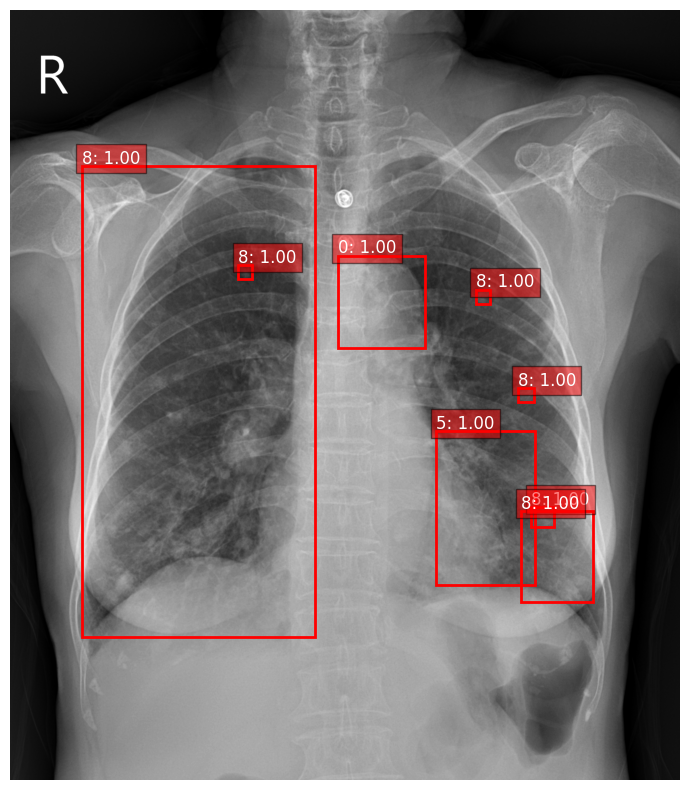

In [64]:
image_id = "27b822c5d3b354f096dfb788fd3fa636"  # This should be the base name of the file you're looking for.
pixel_array = get_pixel_array_from_hdf5("/Volumes/ALEXIS/ai_project_cranfield/dicom_images_final.hdf5", image_id+".dicom")
true_labels = test_df[test_df["image_id"] == image_id]
true_labels["score"] = 1
show_image_with_predictions(pixel_array, true_labels)

### Predicted results without filter

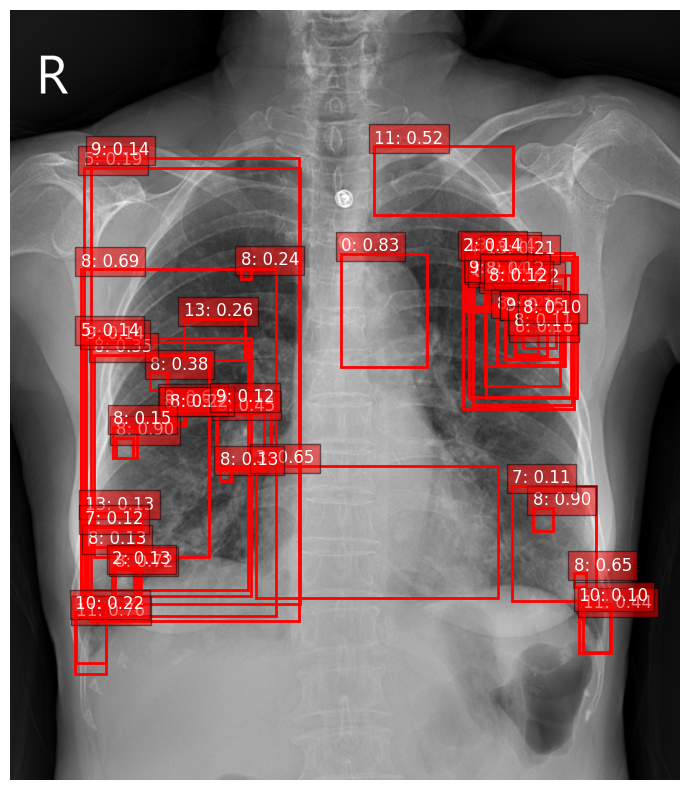

In [65]:
import matplotlib.pyplot as plt

image_id = "27b822c5d3b354f096dfb788fd3fa636"  # This should be the base name of the file you're looking for.
pixel_array = get_pixel_array_from_hdf5("/Volumes/ALEXIS/ai_project_cranfield/dicom_images_final.hdf5", image_id+".dicom")
preds = test_prediction_reformatted[test_prediction_reformatted["image_id"] == image_id]
show_image_with_predictions(pixel_array, preds)

## Data filtering to keep the best prediction for each class for each image

In [66]:
test_prediction_reformatted_grouped = (
    test_prediction_reformatted.groupby("image_id")
    .agg(
        {
            "x_min": list,
            "y_min": list,
            "x_max": list,
            "y_max": list,
            "class_id": list,
            "score": list,
        }
    )
    .reset_index()
)

modified_predictions = []

for _, row in test_prediction_reformatted_grouped.iterrows():
    image_id = row["image_id"]
    x_mins, y_mins, x_maxs, y_maxs, class_ids, scores = (
        row["x_min"],
        row["y_min"],
        row["x_max"],
        row["y_max"],
        row["class_id"],
        row["score"],
    )

    best_predictions = {}
    for x_min, y_min, x_max, y_max, class_id, score in zip(
        x_mins, y_mins, x_maxs, y_maxs, class_ids, scores
    ):
        # Garder uniquement le meilleur score pour chaque class_id
        if class_id not in best_predictions or score > best_predictions[class_id][5]:
            best_predictions[class_id] = (x_min, y_min, x_max, y_max, class_id, score)

        # Flatten the dictionary back to the list format expected
        for class_id, best_prediction in best_predictions.items():
            modified_predictions.append(
                {
                    "image_id": image_id,
                    "x_min": [best_prediction[0]],
                    "y_min": [best_prediction[1]],
                    "x_max": [best_prediction[2]],
                    "y_max": [best_prediction[3]],
                    "class_id": [best_prediction[4]],
                    "score": [best_prediction[5]],
                }
            )


# Convertir la liste des dictionnaires en DataFrame
reconstructed_df = pd.DataFrame(modified_predictions)

# Afficher les premières lignes du DataFrame pour vérifier
reconstructed_df.head()

# Initialisation d'une liste pour stocker les lignes du DataFrame décomposé
expanded_rows = []

# Itération sur chaque ligne du DataFrame agrégé
for _, row in reconstructed_df.iterrows():
    # Nombre de prédictions pour l'image actuelle
    num_predictions = len(row['class_id'])
    
    # Itération sur chaque prédiction pour l'image actuelle
    for i in range(num_predictions):
        expanded_row = {
            'image_id': row['image_id'],
            'x_min': row['x_min'][i] if i < len(row['x_min']) else None,
            'y_min': row['y_min'][i] if i < len(row['y_min']) else None,
            'x_max': row['x_max'][i] if i < len(row['x_max']) else None,
            'y_max': row['y_max'][i] if i < len(row['y_max']) else None,
            'class_id': row['class_id'][i] if i < len(row['class_id']) else None,
            'score': row['score'][i] if i < len(row['score']) else None,
        }
        # Ajout de la ligne décomposée à la liste
        expanded_rows.append(expanded_row)

# Conversion de la liste de lignes décomposées en un nouveau DataFrame
test_prediction_reformatted = pd.DataFrame(expanded_rows)

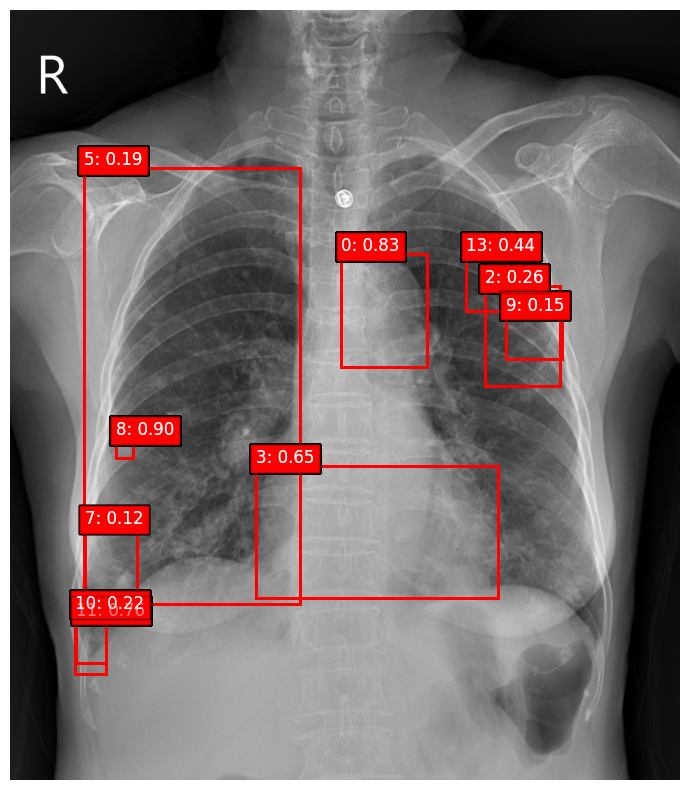

In [67]:
import matplotlib.pyplot as plt

image_id = "27b822c5d3b354f096dfb788fd3fa636"  # This should be the base name of the file you're looking for.
pixel_array = get_pixel_array_from_hdf5("/Volumes/ALEXIS/ai_project_cranfield/dicom_images_final.hdf5", image_id+".dicom")
preds = test_prediction_reformatted[test_prediction_reformatted["image_id"] == image_id]
show_image_with_predictions(pixel_array, preds)